# Data Preprocessing

In [1]:
import time
start_time = time.time()

In [2]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.metrics import mean_squared_log_error

from sklearn.model_selection import train_test_split
from sklearn import metrics

In [3]:
df= pd.read_excel('Neff_CL.xlsx')

In [4]:
df.head(3)

,d1(µm),d2(µm),p(µm),tg(µm),na,wl(µm),Neff core (real-imaginary),Neff y core real,Confinement Loss
0,0.6,1.0,2.0,0.03,1.31,0.40,1.468976662930966-5.242989999317293E-6i,1.468977,7.153519
1,0.6,1.0,2.0,0.03,1.31,0.41,1.4678701284077638-8.710439644980253E-6i,1.467870,11.594631
2,0.6,1.0,2.0,0.03,1.31,0.42,1.4668416577301797-1.124317402231305E-5i,1.466842,14.609668


In [5]:
df.shape

(5268, 9)

In [6]:
for column in df.columns:
    print(column,':',df[column].unique())

d1(µm) : [0.6 1.6 1.4 1.2 0.8 1. ]
d2(µm) : [1.  0.8 0.6 1.2]
p(µm) : [2.  2.5 3. ]
tg(µm) : [0.03 0.04 0.05 0.06]
na : [1.31 1.32 1.33 1.34 1.35 1.36 1.37 1.38 1.39 1.4  1.41 1.42]
wl(µm) : [0.4  0.41 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53
 0.54 0.55 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67
 0.68 0.69 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.8
 0.81 0.82 0.83 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94
 0.95 0.96 0.97 0.98 0.99 1.   1.01 1.02 1.03 1.04 1.05 1.06 1.07 1.08
 1.09 1.1  1.11 1.12 1.13 1.14 1.15 1.16 1.17 1.18 1.19 1.2  1.21 1.22
 1.23 1.24 1.25 1.26 1.27 1.28 1.29 1.3  1.31 1.32 1.33 1.34 1.35 1.6
 1.61 1.62 1.63 1.64 1.65 1.66 1.67 1.68 1.69 1.7  1.71 1.72 1.73 1.74
 1.75 1.76 1.77 1.78 1.79 1.8  1.81 1.82 1.83 1.84 1.85 1.86 1.87 1.88
 1.89 1.9  1.91 1.92 1.93 1.94 1.95 0.79 0.8  0.81 0.82 0.83 0.84 0.85
 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.98 0.99 0.97 1.01 1.03 1.07
 1.09 1.13 1.14 1.15 1.16 1.17

In [7]:
data=df[['d1(µm)', 'd2(µm)', 'p(µm)', 'tg(µm)', 'na', 'wl(µm)', 'Neff y core real', 'Confinement Loss ']]

In [8]:
data.columns

Index(['d1(µm)', 'd2(µm)', 'p(µm)', 'tg(µm)', 'na', 'wl(µm)',
       'Neff y core real', 'Confinement Loss '],
      dtype='object')

In [9]:
data.shape

(5268, 8)

In [10]:
data.loc[data.duplicated(), :]

,d1(µm),d2(µm),p(µm),tg(µm),na,wl(µm),Neff y core real,Confinement Loss
4238,0.6,1.0,2.5,0.03,1.41,0.78,1.451069,47.402916
4396,0.6,1.0,2.5,0.04,1.41,0.87,1.448698,39.805653
4397,0.6,1.0,2.5,0.04,1.41,0.88,1.448446,48.881936
4403,0.6,1.0,2.5,0.04,1.41,0.94,1.447440,238.981821
4404,0.6,1.0,2.5,0.04,1.41,0.95,1.447166,333.972602
4405,0.6,1.0,2.5,0.04,1.41,0.96,1.447703,256.382459
4524,0.6,1.0,2.5,0.05,1.41,1.02,1.446141,122.029008
4534,0.6,1.0,2.5,0.05,1.41,1.13,1.444020,67.011052
4661,0.6,1.0,2.5,0.06,1.41,0.98,1.446881,32.908578
4663,0.6,1.0,2.5,0.06,1.41,1.00,1.446481,42.703974


In [11]:
data = data.drop_duplicates()

In [12]:
data.shape

(5252, 8)

In [13]:
data.isnull().sum().sum()

0

In [14]:
data.isnull().sum()

d1(µm)               0
d2(µm)               0
p(µm)                0
tg(µm)               0
na                   0
wl(µm)               0
Neff y core real     0
Confinement Loss     0
dtype: int64

In [15]:
numeric_features = data.select_dtypes(include=[np.number])
numeric_features.dtypes

d1(µm)               float64
d2(µm)               float64
p(µm)                float64
tg(µm)               float64
na                   float64
wl(µm)               float64
Neff y core real     float64
Confinement Loss     float64
dtype: object

In [16]:
#Null value filling with mean
for col in numeric_features:
    data[col].fillna(data[col].mean(), inplace=True)

In [17]:
data.isnull().sum().sum()

0

## Train Test Split

In [18]:
X=data[['d1(µm)', 'd2(µm)', 'p(µm)', 'tg(µm)', 'na', 'wl(µm)']]
Y=data[['Confinement Loss ']]

In [19]:
X_validate=X[1025:1045]
X_validate.shape

(20, 6)

In [20]:
X=X.drop(labels=range(1025, 1045), axis=0)

In [21]:
X.shape

(5232, 6)

In [22]:
X.head()

,d1(µm),d2(µm),p(µm),tg(µm),na,wl(µm)
0,0.6,1.0,2.0,0.03,1.31,0.40
1,0.6,1.0,2.0,0.03,1.31,0.41
2,0.6,1.0,2.0,0.03,1.31,0.42
3,0.6,1.0,2.0,0.03,1.31,0.43
4,0.6,1.0,2.0,0.03,1.31,0.44


In [23]:
Y_validate=Y[1025:1045]
Y_validate.shape

(20, 1)

In [24]:
Y=Y.drop(labels=range(1025, 1045), axis=0)

In [25]:
Y.shape

(5232, 1)

In [26]:
Y.head()

,Confinement Loss
0,7.153519
1,11.594631
2,14.609668
3,14.910261
4,15.022906


In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

# Scalling

In [28]:
from sklearn.preprocessing import MinMaxScaler
from pandas import DataFrame
scaler1 = MinMaxScaler()
scaler2 = MinMaxScaler()
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

In [29]:
scaler1.fit(X)
scaler2.fit(Y)

x_train = scaler1.transform(X_train)
y_train = scaler2.transform(Y_train)
x_test = scaler1.transform(X_test)
y_test = scaler2.transform(Y_test)

x_validate = scaler1.transform(X_validate)
y_validate = scaler2.transform(Y_validate)
#scaler_datafile=DataFrame(scaler_datafile_1,  columns = data.columns)
#X=scaler_datafile[['d1(um)', 'd2(um)', 'tg(um)', 'na', 'wl']]
#Y=DataFrame(scaler_out_datafile_1,  columns = out_var_datafile_1.columns)


#data for validation with actual data#

In [30]:
y_train

array([[0.13018289],
       [0.21656357],
       [0.19655764],
       ...,
       [0.02918682],
       [0.03222683],
       [0.00596743]])

In [31]:
y_test

array([[0.0078679 ],
       [0.02271771],
       [0.0578427 ],
       ...,
       [0.1524321 ],
       [0.01233484],
       [0.00966209]])

In [32]:
x_train

array([[1.        , 0.33333333, 0.        , 0.33333333, 0.09090909,
        0.09473684],
       [0.        , 0.66666667, 1.        , 0.        , 1.        ,
        0.31578947],
       [0.6       , 0.66666667, 0.        , 0.33333333, 0.36363636,
        0.12105263],
       ...,
       [0.        , 0.66666667, 1.        , 1.        , 0.72727273,
        0.2       ],
       [0.        , 0.66666667, 1.        , 1.        , 0.90909091,
        0.31578947],
       [0.        , 0.66666667, 0.        , 0.66666667, 0.18181818,
        0.21052632]])

In [33]:
x_test

array([[0.8       , 0.33333333, 0.        , 0.33333333, 0.        ,
        0.18421053],
       [0.8       , 0.33333333, 0.        , 0.33333333, 0.09090909,
        0.05263158],
       [0.6       , 1.        , 0.        , 0.33333333, 0.45454545,
        0.14736842],
       ...,
       [0.6       , 1.        , 0.        , 0.33333333, 0.54545455,
        0.13684211],
       [0.        , 0.66666667, 0.        , 0.66666667, 0.09090909,
        0.05263158],
       [0.        , 0.66666667, 0.5       , 1.        , 0.72727273,
        0.24210526]])

# **RandomForestRegressor**

In [34]:
modelRF = RandomForestRegressor(n_estimators=100, random_state=42)
modelRF.fit(x_train, y_train)

y_train_pred = modelRF.predict(x_train)
y_test_pred = modelRF.predict(x_test)
#x_train_pred=x_train_pred.reshape(-1,1)
#x_test_pred=x_test_pred.reshape(-1,1)

RF_train_MSE=mean_squared_error(y_train,y_train_pred)
RF_test_MSE=mean_squared_error(y_test,y_test_pred)
RF_train_r2=r2_score(y_train,y_train_pred)
RF_test_r2=r2_score(y_test,y_test_pred)

print('MSE train data: %.7f, MSE test data: %.7f' % (RF_train_MSE,RF_test_MSE))
print('R2 train data: %.7f, R2 test data: %.7f' % (RF_train_r2,RF_test_r2))

MSE train data: 0.0000958, MSE test data: 0.0009756
R2 train data: 0.9939957, R2 test data: 0.9401951


In [35]:
# Reverse scaling the predictions
y_train_actual = scaler2.inverse_transform(y_train)
y_train_pred_actual = scaler2.inverse_transform(y_train_pred.reshape(-1, 1))
y_test_actual = scaler2.inverse_transform(y_test)
y_test_pred_actual = scaler2.inverse_transform(y_test_pred.reshape(-1, 1))

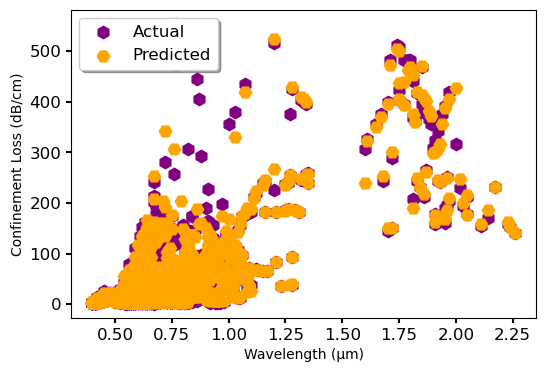

In [36]:
# Plotting
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6,4))
plt.xlabel("Wavelength (µm)")
plt.ylabel("Confinement Loss (dB/cm)")
# plt.title("Model Predictions vs Actual Data")

# Use scatter plots with different markers and increased marker size for better visibility
ax.scatter(X_test['wl(µm)'], y_test_actual, label="Actual", color='purple', marker='h', s=80)  # Hexagon marker
ax.scatter(X_test['wl(µm)'], y_test_pred_actual, label="Predicted", color='orange', marker='H', s=80)  # X marker

# Customize the legend
# Customizing tick parameters for better readability
ax.tick_params(axis='both', which='major', labelsize=12, width=1.5)
ax.tick_params(axis='both', which='minor', labelsize=12, width=1)
ax.legend(fontsize='large', title_fontsize='12', loc='upper left', frameon=True, shadow=True)

plt.show()

# Data Validation

In [37]:
X_validate.head()

,d1(µm),d2(µm),p(µm),tg(µm),na,wl(µm)
1025,1.2,0.6,2.0,0.04,1.33,0.40
1026,1.2,0.6,2.0,0.04,1.33,0.41
1027,1.2,0.6,2.0,0.04,1.33,0.42
1028,1.2,0.6,2.0,0.04,1.33,0.43
1029,1.2,0.6,2.0,0.04,1.33,0.44


In [38]:
Y_validate.head()

,Confinement Loss
1025,2.925101
1026,4.169080
1027,5.962469
1028,7.957656
1029,9.746590


In [39]:
Wavelength=data['wl(µm)'][1025:1045]
Wavelength

1025    0.40
1026    0.41
1027    0.42
1028    0.43
1029    0.44
1030    0.45
1031    0.46
1032    0.47
1033    0.48
1034    0.49
1035    0.50
1036    0.51
1037    0.52
1038    0.53
1039    0.54
1040    0.55
1041    0.56
1042    0.57
1043    0.58
1044    0.59
Name: wl(µm), dtype: float64

# **Performance Comparison after K-fold**

In [40]:
from sklearn.metrics import accuracy_score
from sklearn import model_selection
from sklearn.model_selection import KFold

In [41]:
# Define your classifiers
models = {
    'DTR': DecisionTreeRegressor(random_state=42),
    'RFR': RandomForestRegressor(n_estimators=36, random_state=25),
    'KNN': KNeighborsRegressor(n_neighbors = 5),
    'GBR':  GradientBoostingRegressor(n_estimators=56, learning_rate=0.08, max_depth=7, random_state=82),
    'XGBR': XGBRegressor(n_estimators=53, random_state=35, max_depth=7, min_child_weight=3, learning_rate=0.24, reg_lambda=2),
    'BR' : BaggingRegressor(n_estimators=36, random_state=25),
}


In [42]:
pred_Kfold=[]
# Initialize dictionaries to store metrics for each regressor
metrics = {
    name: {'train_mae': [], 'test_mae': [], 'train_mse': [], 'test_mse': [], 'train_r2': [], 'test_r2': [], 'train_time': [], 'test_time': []} for name in models
}
scaler_x.fit(X)
scaler_y.fit(Y)

x = scaler_x.transform(X)
y = scaler_y.transform(Y)

# Set up your k-fold cross-validation
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

# Perform k-fold cross-validation for each regressor
for name, model in models.items():
    print(name)
    for train_index, test_index in kfold.split(X):
        start = time.time()
        Xtrain, Xtest = x[train_index], x[test_index]
        Ytrain, Ytest = y[train_index], y[test_index]

        # Train the regressor
        model.fit(Xtrain, Ytrain)
       
        ########
        y_train_pred = model.predict(Xtrain)
        end = time.time()
        train_time=end - start
        print("Train time:",train_time)
        
        start = time.time()
        y_test_pred = model.predict(Xtest)
        end = time.time()
        test_time=end - start
        print("Test time:",test_time)
        
        pred_Kfold.append(y_test_pred)

        # Calculate Performance
        train_MAE = mean_absolute_error(Ytrain,y_train_pred)
        test_MAE = mean_absolute_error(Ytest,y_test_pred)
        train_MSE=mean_squared_error(Ytrain,y_train_pred)
        test_MSE=mean_squared_error(Ytest,y_test_pred)
        train_r2=r2_score(Ytrain,y_train_pred)
        test_r2=r2_score(Ytest,y_test_pred)

        #print('MSE train data: %.7f, MSE test data: %.7f' % (train_MSE,test_MSE))
        #print('R2 train data: %.7f, R2 test data: %.7f' % (train_r2,test_r2))
        
        # Append metrics to the dictionary
        metrics[name]['train_mae'].append(train_MAE)
        metrics[name]['test_mae'].append(test_MAE)    
        metrics[name]['train_mse'].append(train_MSE)
        metrics[name]['test_mse'].append(test_MSE)
        metrics[name]['train_r2'].append(train_r2)
        metrics[name]['test_r2'].append(test_r2)
        metrics[name]['train_time'].append(train_time)
        metrics[name]['test_time'].append(test_time)
# Calculate the mean of metrics across all folds for each regressor
mean_metrics = {name: {metric: np.mean(values) for metric, values in metric_dict.items()} for name, metric_dict in metrics.items()}


DTR
Train time: 0.021939754486083984
Test time: 0.000997304916381836
Train time: 0.018949508666992188
Test time: 0.0
Train time: 0.016954421997070312
Test time: 0.0009984970092773438
Train time: 0.016954660415649414
Test time: 0.0009968280792236328
Train time: 0.016954660415649414
Test time: 0.0
Train time: 0.021942853927612305
Test time: 0.0
Train time: 0.016954421997070312
Test time: 0.0
Train time: 0.02538752555847168
Test time: 0.0009984970092773438
Train time: 0.025486469268798828
Test time: 0.0
Train time: 0.027928590774536133
Test time: 0.0
RFR
Train time: 0.8009445667266846
Test time: 0.012965917587280273
Train time: 0.6333029270172119
Test time: 0.012966156005859375
Train time: 0.6073691844940186
Test time: 0.013961553573608398
Train time: 0.6516451835632324
Test time: 0.011967658996582031
Train time: 0.6123569011688232
Test time: 0.010970354080200195
Train time: 0.6303129196166992
Test time: 0.010971784591674805
Train time: 0.565485954284668
Test time: 0.009971141815185547
Tr

In [43]:
result=pd.DataFrame(mean_metrics)
result=result.T
result=result[['train_r2', 'test_r2', 'train_mae', 'test_mae','train_mse', 'test_mse', 'train_time', 'test_time']]
result

,train_r2,test_r2,train_mae,test_mae,train_mse,test_mse,train_time,test_time
DTR,0.999444,0.927159,0.000164,0.010050,0.000009,0.001160,0.020945,0.000399
RFR,0.993567,0.961480,0.003372,0.008576,0.000103,0.000622,0.628663,0.011968
KNN,0.953331,0.909516,0.009809,0.014538,0.000749,0.001430,0.047273,0.004787
GBR,0.946968,0.912935,0.012850,0.016167,0.000850,0.001401,0.497171,0.003089
XGBR,0.976157,0.941124,0.008682,0.012935,0.000383,0.000935,0.320741,0.004289
BR,0.993551,0.961493,0.003373,0.008565,0.000104,0.000622,0.751188,0.014362


In [44]:
pred_Kfold=[]
# Define your classifiers
bestModel = RandomForestRegressor(n_estimators=36, random_state=25)

# Define your classifiers
kfoldModels = {
    '1_Fold': RandomForestRegressor(n_estimators=36, random_state=25),
    '2_Fold': RandomForestRegressor(n_estimators=36, random_state=25),
    '3_Fold': RandomForestRegressor(n_estimators=36, random_state=25),
    '4_Fold': RandomForestRegressor(n_estimators=36, random_state=25),
    '5_Fold': RandomForestRegressor(n_estimators=36, random_state=25),
    '6_Fold': RandomForestRegressor(n_estimators=36, random_state=25),
    '7_Fold': RandomForestRegressor(n_estimators=36, random_state=25),
    '8_Fold': RandomForestRegressor(n_estimators=36, random_state=25),
    '9_Fold': RandomForestRegressor(n_estimators=36, random_state=25),
    '10_Fold': RandomForestRegressor(n_estimators=36, random_state=25)
}

# Initialize dictionaries to store metrics for each classifier
kFoldmetrics = {
    name: {'train_mae': [], 'test_mae': [], 'train_mse': [], 'test_mse': [], 'train_r2': [], 'test_r2': []} for name in kfoldModels
}

X_array=x
Y_array=y
# Perform k-fold cross-validation for each classifier
i = 2
for name, k_model in kfoldModels.items():
    if name == '1_Fold':
        # Single train-test split for '1_Fold'
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)
        k_model.fit(x_train, y_train)
        
        y_train_pred = k_model.predict(x_train)
        y_test_pred = k_model.predict(x_test)
        y_validate_pred = k_model.predict(x_validate)
        pred_Kfold.append(y_validate_pred)

        # Calculate Performance
        train_MAE = mean_absolute_error(y_train, y_train_pred)
        test_MAE = mean_absolute_error(y_test, y_test_pred)
        train_MSE = mean_squared_error(y_train, y_train_pred)
        test_MSE = mean_squared_error(y_test, y_test_pred)
        train_r2 = r2_score(y_train, y_train_pred)
        test_r2 = r2_score(y_test, y_test_pred)
        
        # Append metrics to the dictionary
        kFoldmetrics[name]['train_mae'].append(train_MAE)
        kFoldmetrics[name]['test_mae'].append(test_MAE)    
        kFoldmetrics[name]['train_mse'].append(train_MSE)
        kFoldmetrics[name]['test_mse'].append(test_MSE)
        kFoldmetrics[name]['train_r2'].append(train_r2)
        kFoldmetrics[name]['test_r2'].append(test_r2)
        
    else:
        kfold = KFold(n_splits=i, shuffle=True, random_state=42)
        i=i+1
        for train_index, test_index in kfold.split(X_array):
            X_train, X_test = X_array[train_index], X_array[test_index]
            y_train, y_test = Y_array[train_index], Y_array[test_index]

            # Train the classifier
            k_model.fit(X_train, y_train)

            ########
            y_train_pred = k_model.predict(Xtrain)
            y_test_pred = k_model.predict(Xtest)
            y_validate_pred = k_model.predict(x_validate)
            pred_Kfold.append(y_validate_pred)

            # Calculate Performance
            train_MAE = mean_absolute_error(Ytrain,y_train_pred)
            test_MAE = mean_absolute_error(Ytest,y_test_pred)
            train_MSE=mean_squared_error(Ytrain,y_train_pred)
            test_MSE=mean_squared_error(Ytest,y_test_pred)
            train_r2=r2_score(Ytrain,y_train_pred)
            test_r2=r2_score(Ytest,y_test_pred)

            # Append metrics to the dictionary
            kFoldmetrics[name]['train_mae'].append(train_MAE)
            kFoldmetrics[name]['test_mae'].append(test_MAE)    
            kFoldmetrics[name]['train_mse'].append(train_MSE)
            kFoldmetrics[name]['test_mse'].append(test_MSE)
            kFoldmetrics[name]['train_r2'].append(train_r2)
            kFoldmetrics[name]['test_r2'].append(test_r2)

    # Calculate mean of metrics across all folds for each classifier
mean_metrics_kfold = {name: {kFoldmetrics: sum(values) / len(values) for kFoldmetrics, values in kFoldmetrics.items()} for name, kFoldmetrics in kFoldmetrics.items()}


In [45]:
kFoldresult=pd.DataFrame(mean_metrics_kfold)
kFoldresult=kFoldresult.T
kFoldresult

,train_mae,test_mae,train_mse,test_mse,train_r2,test_r2
1_Fold,0.003657,0.009957,0.000101,0.001038,0.993649,0.936355
2_Fold,0.008929,0.009577,0.000656,0.000640,0.959962,0.950498
3_Fold,0.006477,0.006508,0.000424,0.000348,0.974113,0.973041
4_Fold,0.005285,0.005412,0.000291,0.000254,0.982248,0.980310
5_Fold,0.004693,0.004761,0.000225,0.000209,0.986249,0.983858
6_Fold,0.004463,0.004693,0.000205,0.000207,0.987513,0.984003
7_Fold,0.004182,0.004327,0.000177,0.000179,0.989211,0.986129
8_Fold,0.004047,0.004171,0.000170,0.000174,0.989633,0.986519
9_Fold,0.003962,0.004110,0.000164,0.000157,0.990017,0.987814
10_Fold,0.003895,0.003870,0.000157,0.000135,0.990401,0.989514


In [46]:
pred_DT_reshape=pred_Kfold[0].reshape(-1,1)
#pred_DTB_reshape=pred_Kfold[1].reshape(-1,1)
pred_RF_reshape=pred_Kfold[1].reshape(-1,1)
#pred_RFB_reshape=pred_Kfold[3].reshape(-1,1)
pred_XGB_reshape=pred_Kfold[2].reshape(-1,1)
#pred_XGBB_reshape=pred_Kfold[5].reshape(-1,1)
pred_GB_reshape=pred_Kfold[3].reshape(-1,1)
#pred_GBB_reshape=pred_Kfold[7].reshape(-1,1)
pred_B_reshape=pred_Kfold[4].reshape(-1,1)

predDT=scaler2.inverse_transform(pred_DT_reshape)
#predDTB=scaler2.inverse_transform(pred_DTB_reshape)
predRF=scaler2.inverse_transform(pred_RF_reshape)
#predRFB=scaler2.inverse_transform(pred_RFB_reshape)
predXGB=scaler2.inverse_transform(pred_XGB_reshape)
#predXGBB=scaler2.inverse_transform(pred_XGBB_reshape)
predGB=scaler2.inverse_transform(pred_GB_reshape)
#predGBB=scaler2.inverse_transform(pred_GBB_reshape)
predB=scaler2.inverse_transform(pred_B_reshape)
Yvalidate=scaler2.inverse_transform(Y_validate)

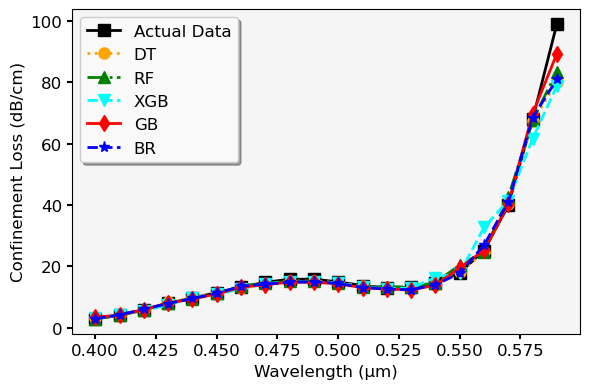

In [47]:
import matplotlib.pyplot as plt

# Create subplots with a larger figure size for better visualization
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))

# Labels and titles
ax.set_xlabel("Wavelength (µm)", fontsize=12)
ax.set_ylabel("Confinement Loss (dB/cm)", fontsize=12)
#ax.set_title("Model Predictions vs Actual Data", fontsize=18, fontweight='bold')

# Plot actual data with a solid line and square markers
ax.plot(Wavelength, Y_validate, label="Actual Data", color='black', linewidth=2, marker='s', linestyle='-', markersize=8)

# Plot predictions with customized line styles and markers
if predDT is not None:
    ax.plot(Wavelength, predDT, label='DT', color='orange', linewidth=2, marker='o', linestyle=":", markersize=8)
if predRF is not None:
    ax.plot(Wavelength, predRF, label='RF', color='green', linewidth=2, marker='^', linestyle="-.", markersize=8)
if predXGB is not None:
    ax.plot(Wavelength, predXGB, label='XGB', color='cyan', linewidth=2, marker='v', linestyle="--", markersize=8)
if predGB is not None:
    ax.plot(Wavelength, predGB, label='GB', color='red', linewidth=2, marker='d', linestyle="-", markersize=8)
if predB is not None:
    ax.plot(Wavelength, predB, label='BR', color='blue', linewidth=2, marker='*', linestyle="--", markersize=8)

# Customizing the legend with a unique style
legend = ax.legend(loc='best', fontsize=12, frameon=True, shadow=True,title_fontsize='12', fancybox=True)
legend.get_frame().set_facecolor('#f9f9f9')

# Adding grid with unique styling
#ax.grid(True, which='both', color='grey', linestyle='--', linewidth=0.5, alpha=0.7)

# Setting the background color of the plot
ax.set_facecolor('#f5f5f5')

# Customizing tick parameters for better readability
ax.tick_params(axis='both', which='major', labelsize=12, width=1.5)
ax.tick_params(axis='both', which='minor', labelsize=12, width=1)

# Adjust layout to ensure everything fits well
plt.tight_layout()

# Show the plot
plt.show()

In [48]:
Y_validate

,Confinement Loss
1025,2.925101
1026,4.169080
1027,5.962469
1028,7.957656
1029,9.746590
1030,11.492071
1031,13.280932
1032,14.851265
1033,15.845691
1034,15.876478


In [49]:
predRF

array([[ 3.00520493],
       [ 4.09036408],
       [ 5.77387749],
       [ 8.12687582],
       [ 9.40816108],
       [11.23651516],
       [13.71206366],
       [14.56158678],
       [15.14147228],
       [15.12104044],
       [14.61482176],
       [13.48327928],
       [13.42672231],
       [13.34707126],
       [14.77616449],
       [20.47472769],
       [24.72617062],
       [42.67422984],
       [67.53759659],
       [83.44934698]])

# XAI TEST

In [50]:
#!pip install shap
#!pip install lime
import shap
import lime
import lime.lime_tabular
from IPython.core.display import HTML, display
import matplotlib.pyplot as plt
from PIL import Image
import io
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import pandas as pd

# SHAP

In [51]:
import numpy as np
import pandas as pd
import shap
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# 1. Initialize and fit scalers on the original data
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

scaler_x.fit(X)
scaler_y.fit(Y)

# 2. Scale features and target
X_scaled = scaler_x.transform(X)
Y_scaled = scaler_y.transform(Y).flatten()  # Ensure Y is 1D

# 3. Convert scaled data to DataFrame
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
Y_scaled_df = pd.DataFrame(Y_scaled, columns=Y.columns)

# 4. Split the data into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(
    X_scaled_df, Y_scaled_df, test_size=0.25, random_state=42
)

# 5. Train the RandomForest model on scaled data
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, Y_train)

# 6. Calculate SHAP values using the TreeExplainer
explainer = shap.TreeExplainer(model)
shap_values = explainer(X_train)


1
[144.42803686]


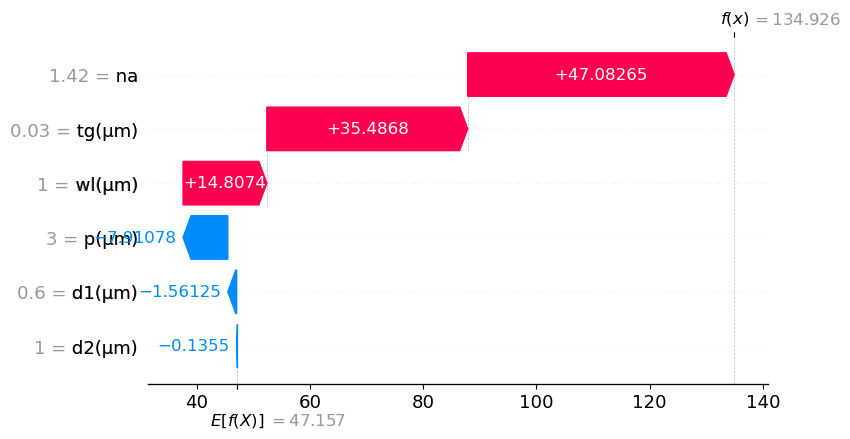

2
[131.15358967]


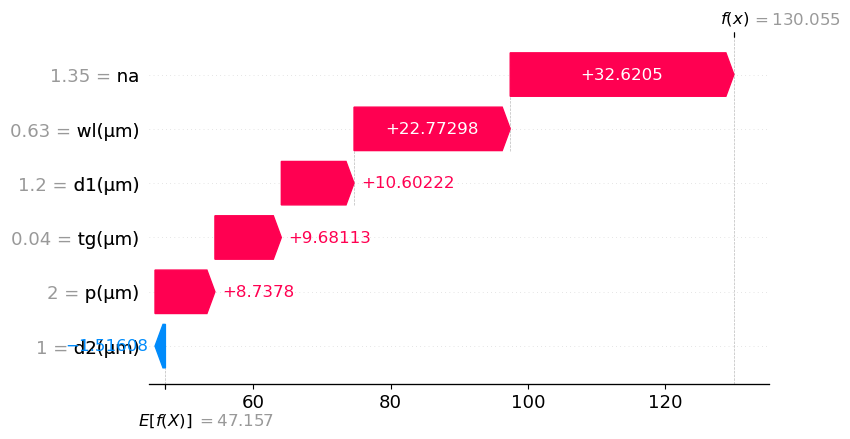

3
[6.36003072]


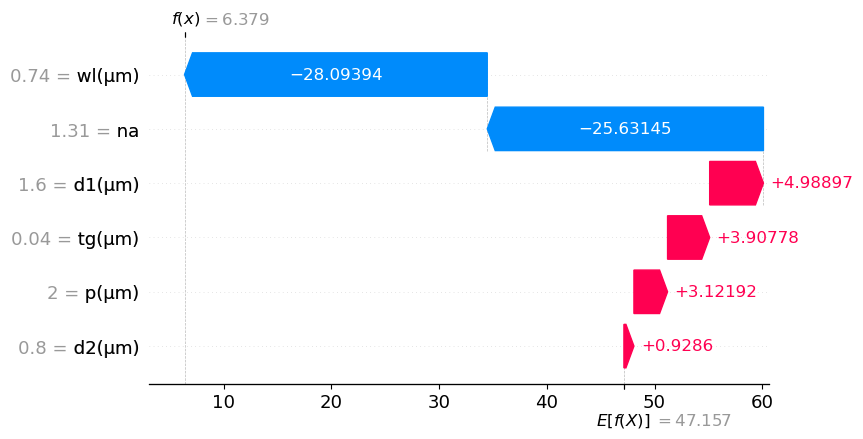

4
[105.53656437]


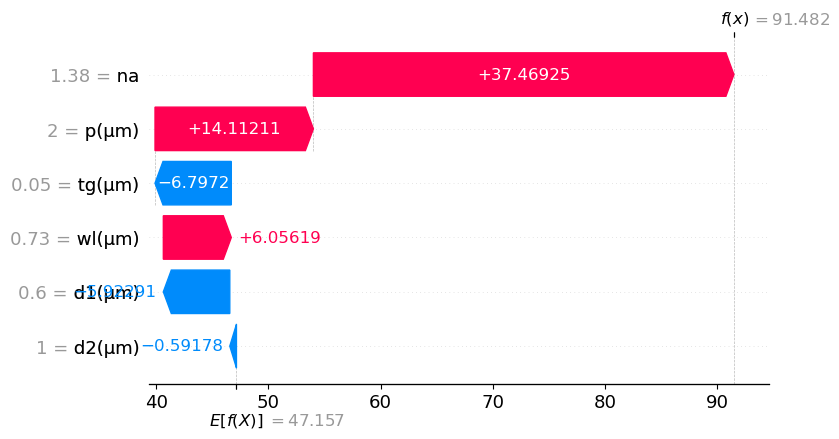

5
[81.13925792]


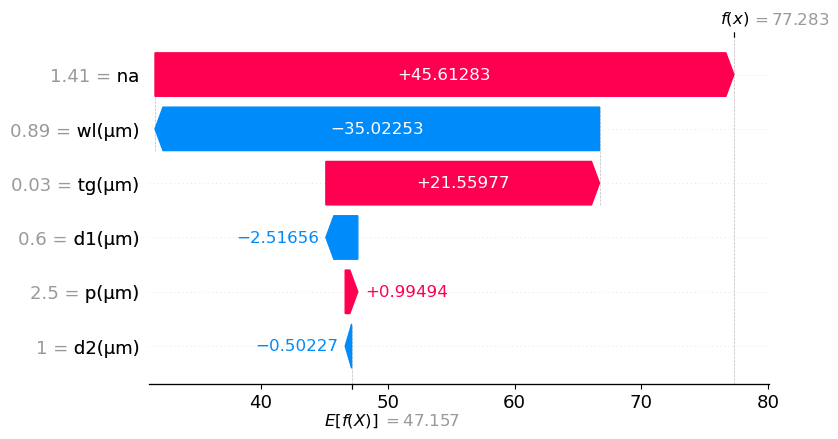

6
[4.97416765]


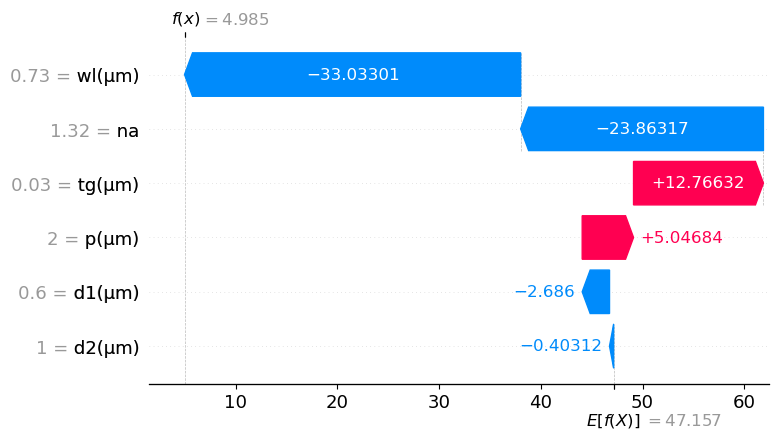

7
[127.21900793]


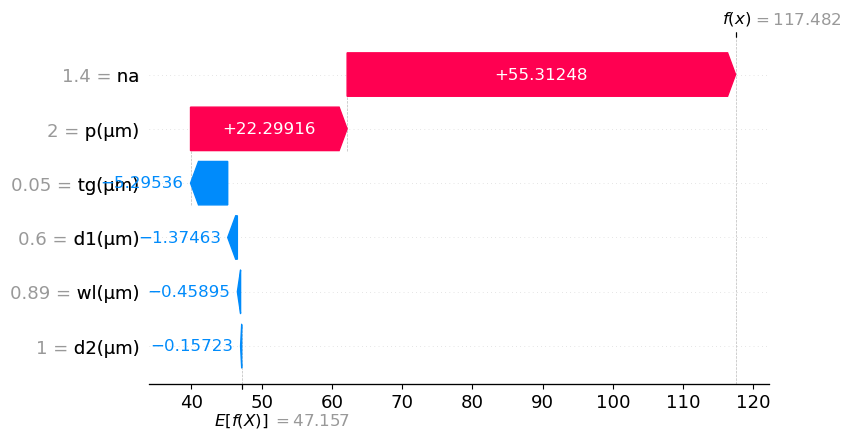

8
[60.70088003]


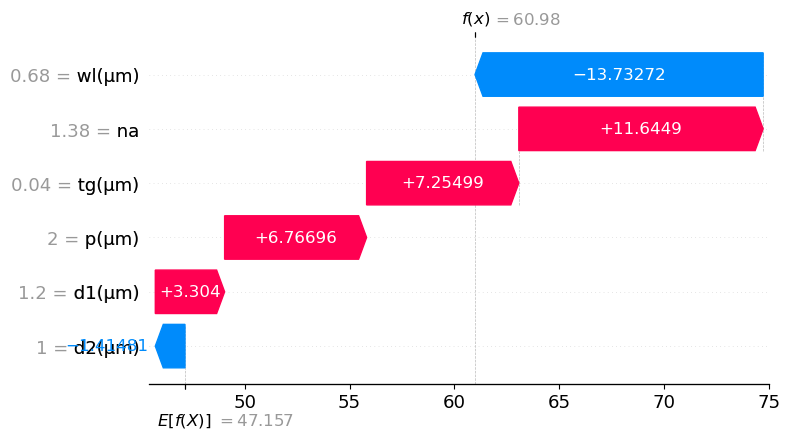

9
[1.57439574]


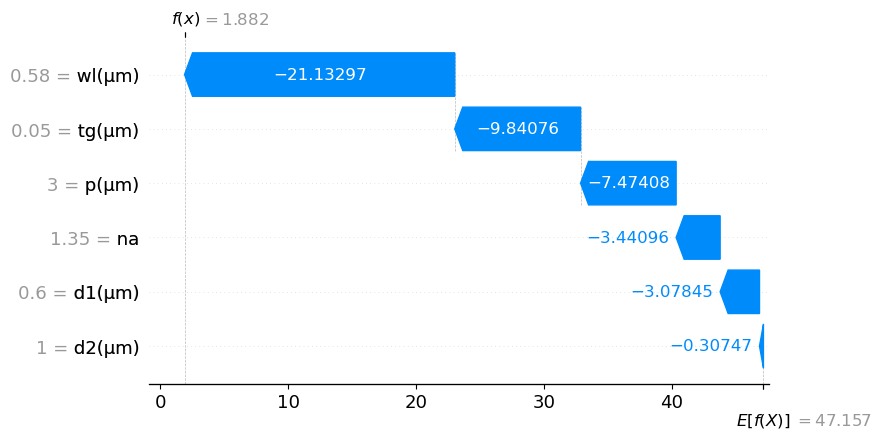

10
[7.31229868]


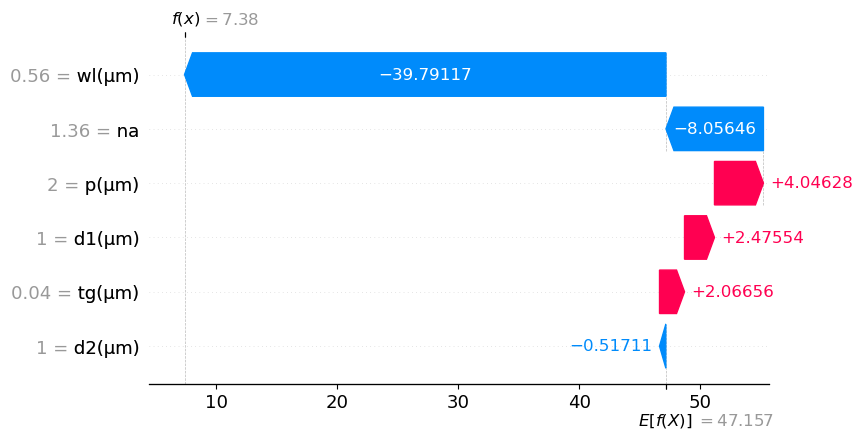

11
[34.24624665]


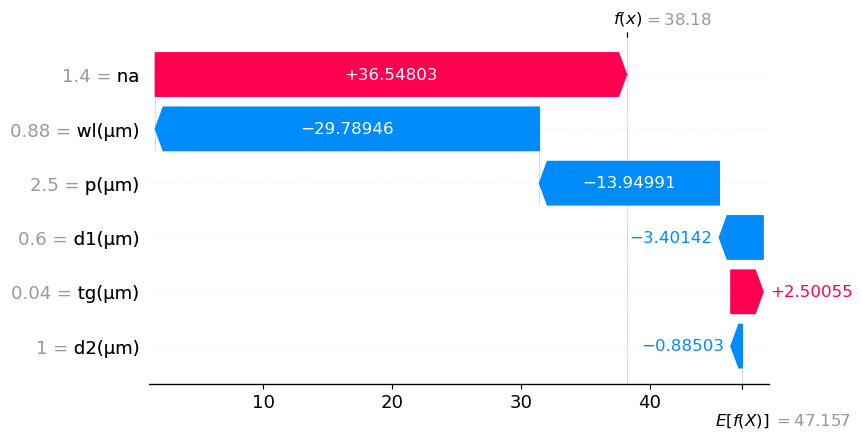

12
[13.48824946]


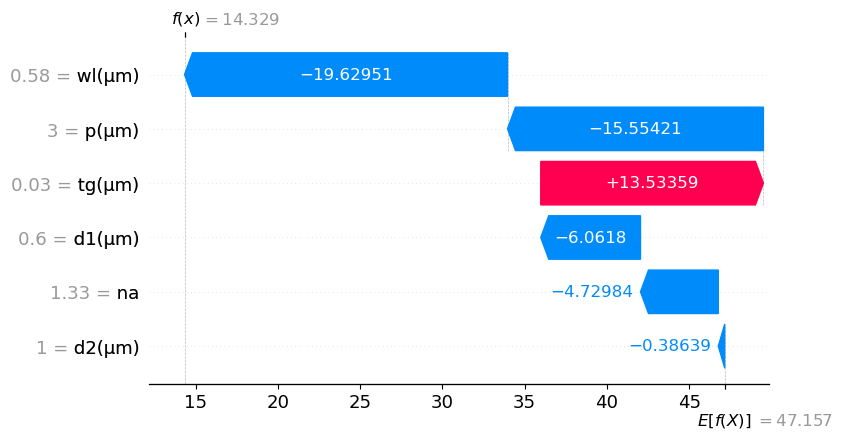

13
[6.00469859]


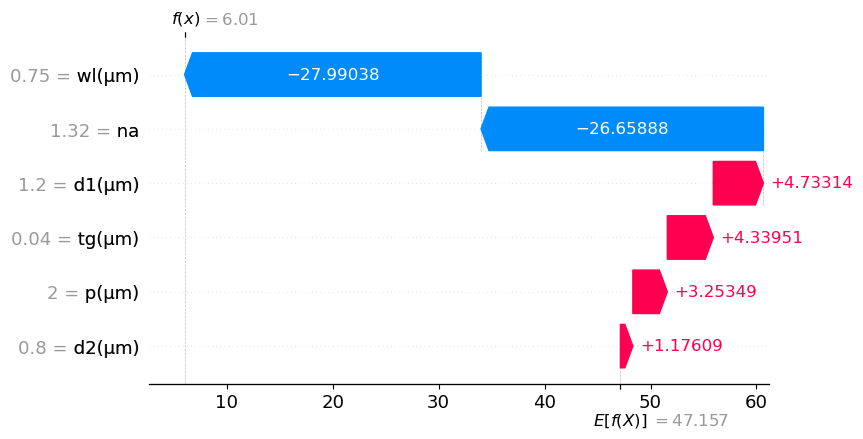

14
[132.71199752]


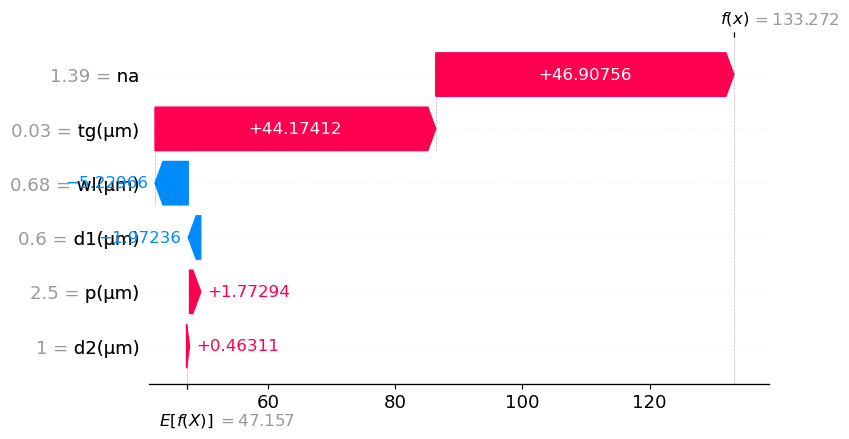

15
[13.43271684]


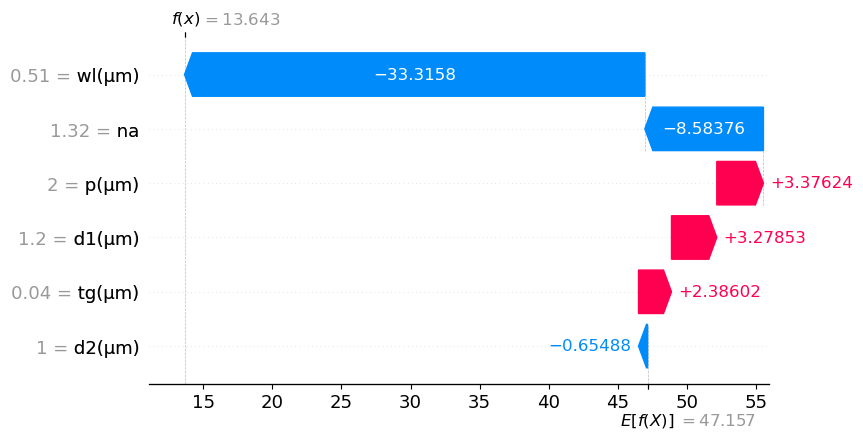

16
[9.70868022]


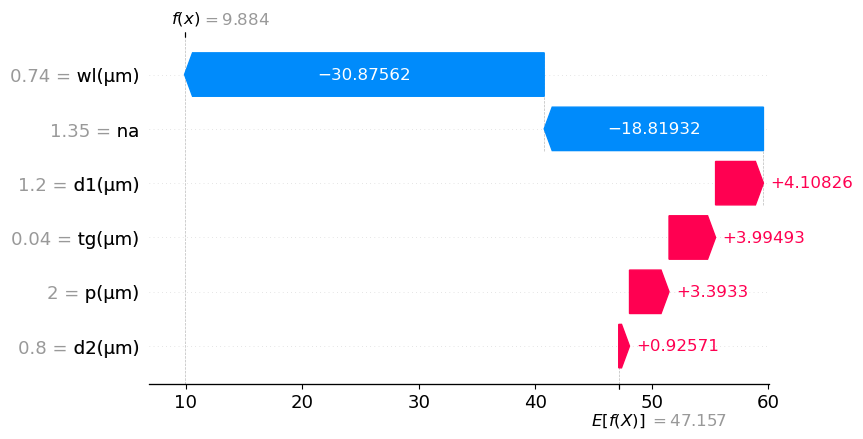

17
[16.72880581]


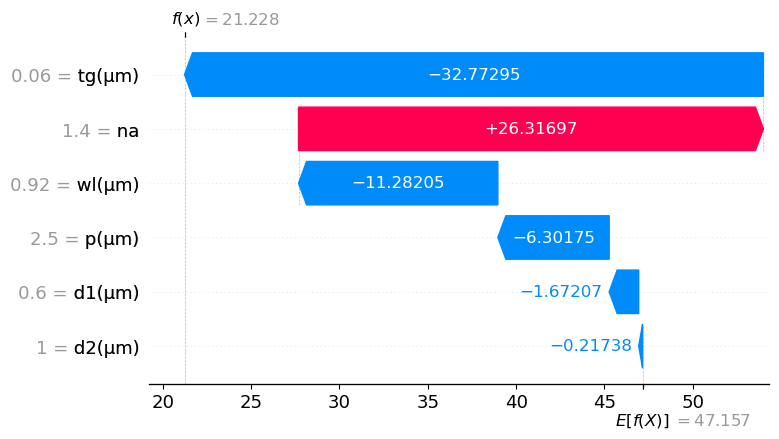

18
[8.28349837]


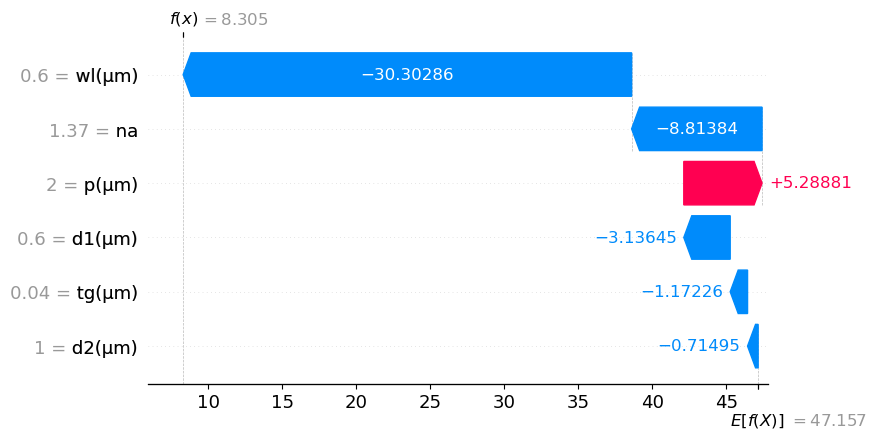

19
[259.69628428]


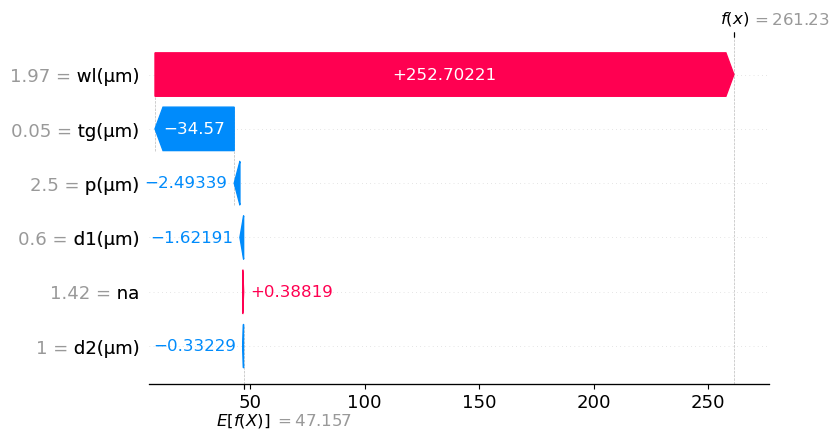

In [52]:
for i in range(1,20):
    # 7. Get the scaled base value and predictions
    base_value_scaled = shap_values.base_values[0]
    pred_scaled = model.predict(X_train.iloc[i].values.reshape(1, -1))[0]

    # 8. Unscale the base value and prediction
    base_value_unscaled = scaler_y.inverse_transform([[base_value_scaled]])[0][0]
    pred_unscaled = scaler_y.inverse_transform([[pred_scaled]])[0][0]

    # 9. Adjust SHAP values to reflect the unscaled output range
    shap_values_adjusted = shap_values.values[i] * (
        (pred_unscaled - base_value_unscaled) / shap_values.values[i].sum()
    )

    # 10. Unscale the input features for interpretability
    X_train_unscaled = scaler_x.inverse_transform(X_train)
    X_train_unscaled_df = pd.DataFrame(X_train_unscaled, columns=X.columns)
    Y_train_unscaled = scaler_y.inverse_transform(Y_train)
    
    print(i)
    print(Y_train_unscaled[i])
    # 11. Generate the waterfall plot with adjusted SHAP values
    shap.waterfall_plot(
        shap.Explanation(
            values=shap_values_adjusted,  # Adjusted SHAP values
            base_values=base_value_unscaled,  # Unscaled base value
            data=X_train_unscaled_df.iloc[i, :],  # Unscaled input features
        ),
        max_display=10  # Display the top 10 features
    )


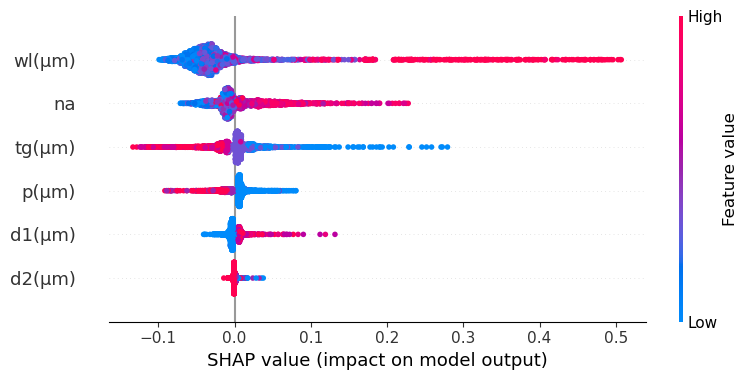

In [53]:
# Visualize the SHAP values for the training data
shap.summary_plot(shap_values, X_train)

In [54]:
shap_values_unscaled= scaler_x.inverse_transform(shap_values.values)

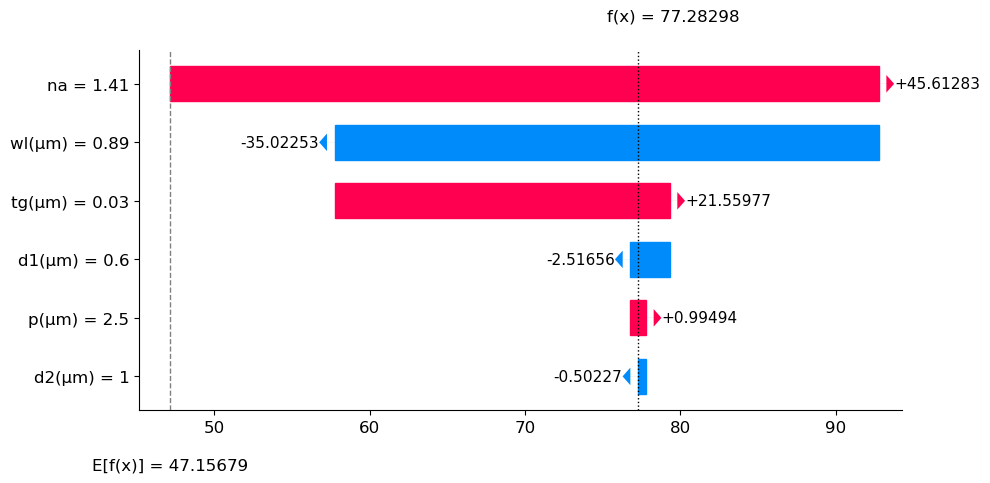

In [55]:
import shap
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Sample index
i = 5

# === 1. Get scaled SHAP values and base/prediction ===
shap_scaled = shap_values.values[i]
base_scaled = shap_values.base_values[i]
pred_scaled = model.predict(X_train.iloc[i].values.reshape(1, -1))[0]

# === 2. Unscale SHAP values ===
shap_unscaled = scaler_y.inverse_transform(shap_scaled.reshape(-1, 1)).flatten() \
                - scaler_y.inverse_transform(np.zeros_like(shap_scaled).reshape(-1, 1)).flatten()
base_unscaled = scaler_y.inverse_transform([[base_scaled]])[0][0]
pred_unscaled = scaler_y.inverse_transform([[pred_scaled]])[0][0]

# === 3. Unscale input features ===
X_train_unscaled = scaler_x.inverse_transform(X_train)
X_train_unscaled_df = pd.DataFrame(X_train_unscaled, columns=X.columns)
input_unscaled = X_train_unscaled_df.iloc[i, :].values


def shap_waterfall_filled_arrow(values, feature_names, base_value, data, max_display=None):
    # Sort features by absolute SHAP value
    sorted_idx = np.argsort(np.abs(values))[::-1]
    if max_display:
        sorted_idx = sorted_idx[:max_display]
    values = values[sorted_idx]
    features = np.array(feature_names)[sorted_idx]
    feature_values = data[sorted_idx]

    labels = [f"{feat} = {val:.3g}" for feat, val in zip(features, feature_values)]
    f_x = base_value + np.sum(values)

    fig, ax = plt.subplots(figsize=(10, 5))
    positions = np.arange(len(values))

    cumulative = base_value
    for pos, val in zip(positions, values):
        color = '#FF0051' if val > 0 else '#008BFB'
        start = cumulative
        end = cumulative + val

        # Draw filled bar
        ax.barh(pos, val, left=start, color=color, edgecolor=color, height=0.6)

        # Add larger, more prominent arrow tip
        arrow_dir = 5 if val > 0 else -5
        ax.arrow(end, pos, arrow_dir * 0.2, 0,
                 head_width=0.3,              # Larger arrow width
                 head_length=0.5, # Longer arrow head like SHAP
                 fc=color, ec=color,
                 length_includes_head=True,
                 lw=0)

        # Annotate SHAP contribution value
        ax.text(end + (1 if val > 0 else -1), pos,
                f"{val:+.5f}", va='center', fontsize=11,
                color='black', ha='left' if val > 0 else 'right')

        cumulative = end

    # Base value reference
    ax.axvline(base_value, color='grey', linestyle='--', linewidth=1)
    ax.text(base_value, len(values)+0.6, f"E[f(x)] = {base_value:.5f}",
            color='black', fontsize=12, ha='center')

    # Final prediction reference
    ax.axvline(f_x, color='black', linestyle=':', linewidth=1)
    ax.text(0.7, 1.08, f"f(x) = {f_x:.5f}",
            color='black', fontsize=12, ha='center', transform=ax.transAxes)

    # Formatting
    ax.set_yticks(positions)
    ax.set_yticklabels(labels, fontsize=12)
    ax.invert_yaxis()
    ax.set_xlim(min(base_value, f_x) - 2, max(base_value, f_x) + 17)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.tick_params(axis='x', labelsize=12)
    ax.set_xlabel("")

    plt.tight_layout()
    plt.show()



# Call updated SHAP-style filled bar with arrow tip
shap_waterfall_filled_arrow(
    values=shap_unscaled,
    feature_names=X.columns,
    base_value=base_unscaled,
    data=input_unscaled,
    max_display=10
)
